<a href="https://colab.research.google.com/github/chetansgode/Rossmann_Retail_Sales_prediction/blob/main/(Retail_Sales_prediction)ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction(Rossmann)



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual



# **Project Summary -**


Rossmann operates over 3000 drug store in 7 European countries. Currently Rossmann Store Manager are tasked with predicting their daily sales for up to six week in advance. Store sales are influenced by many factors, including Promotions,Competition, School and State holidays,Seasonality and locality.with thousand individual managers predicting sales based on their unique circumstances,the accuracy of results can be quite varied.
We have provided with historical sales data fo 1115 rossmann store and task is to forecast Sales.

# **GitHub Link -**

https://github.com/chetansgode/Rossmann_Retail_Sales_prediction.git

# **Problem Statement**


* **we have historical sales data for 1115 rossmann store and task is to forecast Sales and note that some store in dataset were temporary closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np  #importing numpy library
import pandas as pd  #importing pandas library

# for visualisation import matplotlib and seaborn
import matplotlib.pyplot as plt
%matplotlib inline
%lsmagic
import seaborn as sns

#importing sklearn packages for ml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso ,LassoCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

#df_store=pd.read_csv('C:/Users/Admin/Downloads/store (1).csv')
df_store=pd.read_csv('/content/store (1).csv')
#df_sales=pd.read_csv('C:/Users/Admin/Downloads/Rossmann Stores Data (1).csv',parse_dates=['Date'])
df_sales=pd.read_csv('/content/Rossmann Stores Data (1).csv',parse_dates=['Date'])

### Dataset First View

In [3]:
# Dataset First Look

print('for store','\n')   # for store
df_store.head()

for store 



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
print('for sales','\n')   # for sales
df_sales.head()

for sales 



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('for store',df_store.shape)
print('for sales',df_sales.shape)

for store (1115, 10)
for sales (1017209, 9)


### Dataset Information

In [6]:
# Marge 2 data set
df= pd.merge(df_store,df_sales,on='Store',how='left')
print('shape of merge data set',df.shape)

shape of merge data set (1017209, 18)


In [7]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1014567 non-null  float64       
 4   CompetitionOpenSinceMonth  693861 non-null   float64       
 5   CompetitionOpenSinceYear   693861 non-null   float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            509178 non-null   float64       
 8   Promo2SinceYear            509178 non-null   float64       
 9   PromoInterval              509178 non-null   object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())
print('No duplicate value')

0
No duplicate value


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
list_of_null_col=[]
for i in df.columns:
  if df[i].isna().sum() != 0:
    print(i,'null values are :',df[i].isna().sum())
    list_of_null_col.append(i)

CompetitionDistance null values are : 2642
CompetitionOpenSinceMonth null values are : 323348
CompetitionOpenSinceYear null values are : 323348
Promo2SinceWeek null values are : 508031
Promo2SinceYear null values are : 508031
PromoInterval null values are : 508031


In [10]:
print(list_of_null_col)

['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


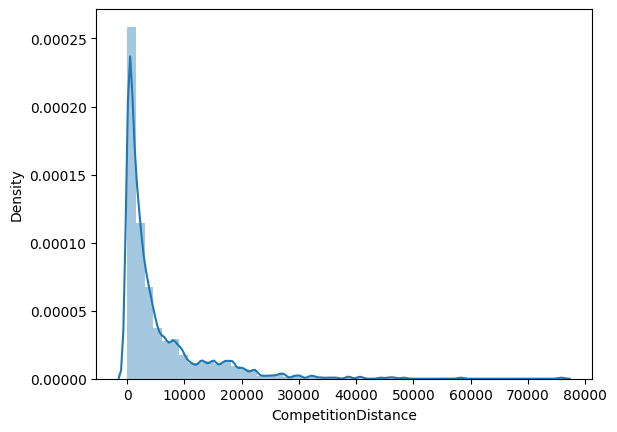

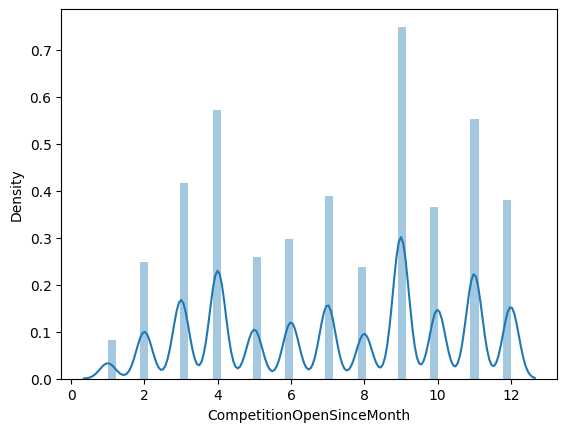

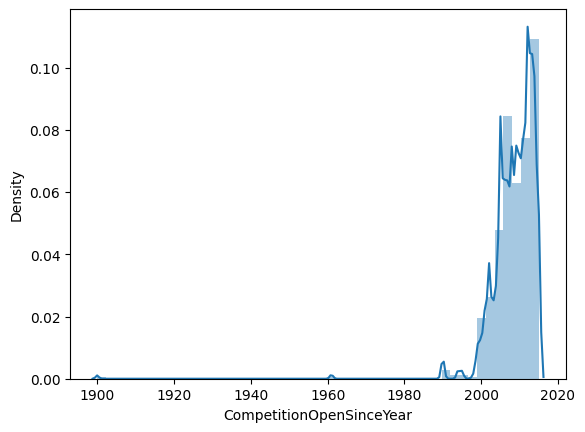

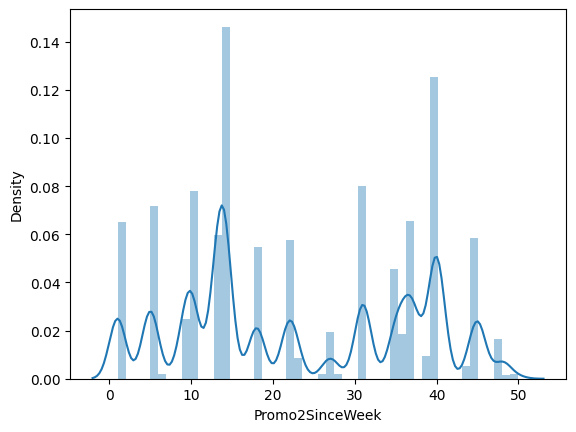

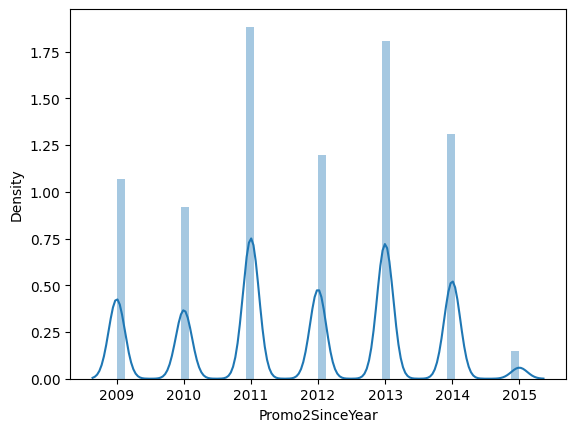

In [12]:
for i in list_of_null_col:
  if i != 'PromoInterval':
    sns.distplot(df[i],bins=50)
    plt.show()

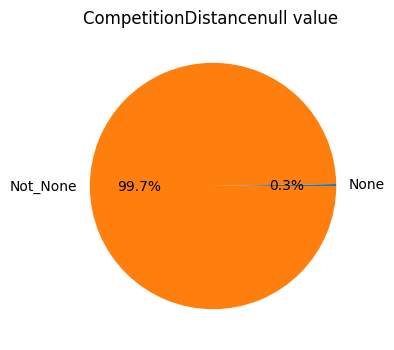

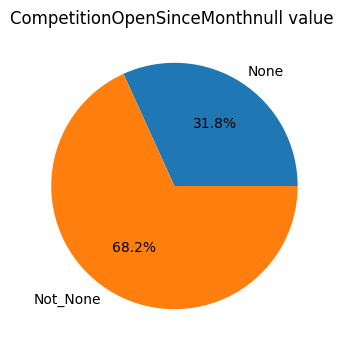

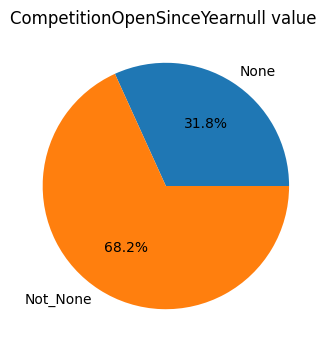

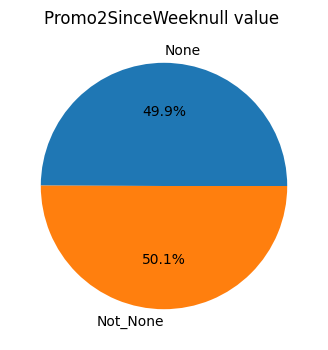

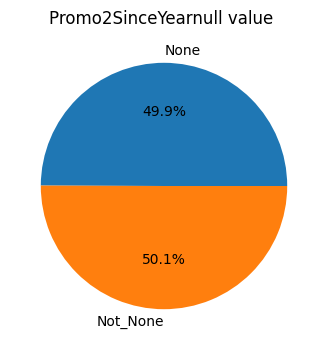

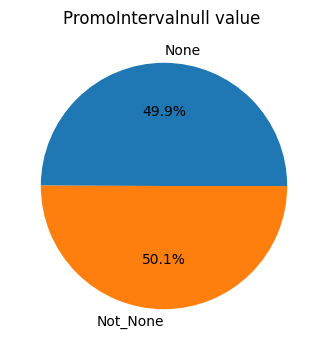

In [13]:
# Visualizing the missing values
for i in list_of_null_col:
  plt.figure(figsize=(4,4))
  labels = ['None', 'Not_None']
  plt.pie([df[i].isna().sum(),df[i].notna().sum()],labels=labels , autopct='%.1f%%')
  plt.title(i +'null value ')
  plt.show()

In [14]:
# Feature Engineering

# there is right skew data in CompetitionDistance so replace null by median value of it
df['CompetitionDistance']=df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# lost of data is missing so replace by 0
for i in list_of_null_col:
  if i != 'CompetitionDistance':
    df[i]=df[i].fillna(0)

#Check none value
for i in list_of_null_col:
  print('none in ',i, df[i].isna().sum())

none in  CompetitionDistance 0
none in  CompetitionOpenSinceMonth 0
none in  CompetitionOpenSinceYear 0
none in  Promo2SinceWeek 0
none in  Promo2SinceYear 0
none in  PromoInterval 0


### What did you know about your dataset?

* there are lots of missing data in some feature
 * CompetitionDistance null values are : 2642
 * CompetitionOpenSinceMonth null values are : 323348
 * CompetitionOpenSinceYear null values are : 323348
 * Promo2SinceWeek null values are : 508031
 * Promo2SinceYear null values are : 508031
 * PromoInterval null values are : 508031
 * shape of merge data set (1017209, 18)

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description


* store-Store_id
* Sales-Sales made for the day
* Customers - Footfall for the day
* Open-Open or close
* StateHoliday- State holiday or not
* SchoolHoliday - School holiday or not
* StoreType - Types of store
* Assortment-Type of assortment
* CompetitionDistance-Distance from nearest competition
* Promo- Store running promotion or not
* Promo2-Store running consecutive promotion or not
* PromoInterval-Promotion intervals

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.

for j,i in enumerate(df.columns):
  aa= df[i].nunique()
  a=df[i].value_counts()
  print(f"{j+1}-- {i} variable has unique value is :- {aa} \n and unique value counts are :-\n {a} ")
  print('--'*20)

1-- Store variable has unique value is :- 1115 
 and unique value counts are :-
 1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64 
----------------------------------------
2-- StoreType variable has unique value is :- 4 
 and unique value counts are :-
 a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64 
----------------------------------------
3-- Assortment variable has unique value is :- 3 
 and unique value counts are :-
 a    537445
c    471470
b      8294
Name: Assortment, dtype: int64 
----------------------------------------
4-- CompetitionDistance variable has unique value is :- 654 
 and unique value counts are :-
 250.0      11120
350.0       7536
50.0        7536
1200.0      7374
190.0       7352
           ...  
3920.0       758
4460.0       758
13090.0      758
5890.0       758
12870.0      758
Name: CompetitionDistance, Length: 654, d

## 3. ***Data Wrangling***

### Data Wrangling Code

In [58]:
# Write your code to make your dataset analysis ready.

##Feature engineering

# Write your code to make your dataset analysis ready.

# store id not needed for further calculation so drop it
df.drop('Store',axis=1,inplace=True)

# StoreType has categorical variable a,b,c,d replace by 1,2,3,4 simultaneously.
df['StoreType'].replace({'a':1,'b':2,'c':3,'d':4},inplace=True)

# Assortment has categorical variable a,b,c replace by 1,2,3 simultaneously.
df['Assortment'].replace({'a':1,'b':2,'c':3},inplace=True)

# We categorize the CompetitionDistance has unique distances too much (654) so in 10 category
df['CompetitionDistance']= df['CompetitionDistance'].apply(lambda x: 5 if x<= 500 else(10 if x<=1000 else (15 if x<=1500 else(20 if x<=2000 else(30 if x<=3000 else(40 if x<=4000 else(50 if x<= 5000 else(60 if x<=6000 else(70)))))))) )

#We replace string category of variable PromoInterval 0,'Jan,Apr,Jul,Oct ','Feb,May,Aug,Nov ','Mar,Jun,Sept,Dec' by 0,1,2,3
df['PromoInterval'].replace({'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3},inplace=True)

#We replace category name of StateHoliday to 0,1,2,3
df['StateHoliday'].replace({'0':0,'a':1,'b':2,'c':3},inplace=True)

### promo2sinceweek has to many unique value for further calculation we convert it into bucket 10week in a group like that.
df['Promo2SinceWeek']=df['Promo2SinceWeek'].apply(lambda x : 1 if x < 10 else(2 if 10<=x<20 else(3 if 20<=x<30 else(4 if 30<=x<40 else 5))))





### What all manipulations have you done and insights you found?

* we changed the name of Category in all variable.
 * Store id not needed for further calculation so drop it.
 * StoreType has categorical variable a,b,c,d replace by 1,2,3,4 simultaneously.
 * Assortment has categorical variable a,b,c replace by 1,2,3 simultaneously.
 * We categorize the CompetitionDistance has unique distances too much (654) so in 10 category.
 * We replace string category of variable PromoInterval 0,'Jan,Apr,Jul,Oct ','Feb,May,Aug,Nov ','Mar,Jun,Sept,Dec' by 0,1,2,3
 *We replace category name of StateHoliday to 0,1,2,3

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-Check Sales with respect to StoreType and then Assortment

StoreType
4     5641.819243
3     5723.629246
1     5738.179710
2    10058.837334
Name: Sales, dtype: float64
----------------------------------------
Assortment
1    5481.026096
3    6058.676567
2    8553.931999
Name: Sales, dtype: float64
----------------------------------------
Assortment             1            2             3
StoreType                                          
1            5398.858310          NaN   6310.867032
2           10821.619806  8553.931999  17969.556263
3            5647.174314          NaN   5805.782193
4            5317.885943          NaN   5826.407660
----------------------------------------


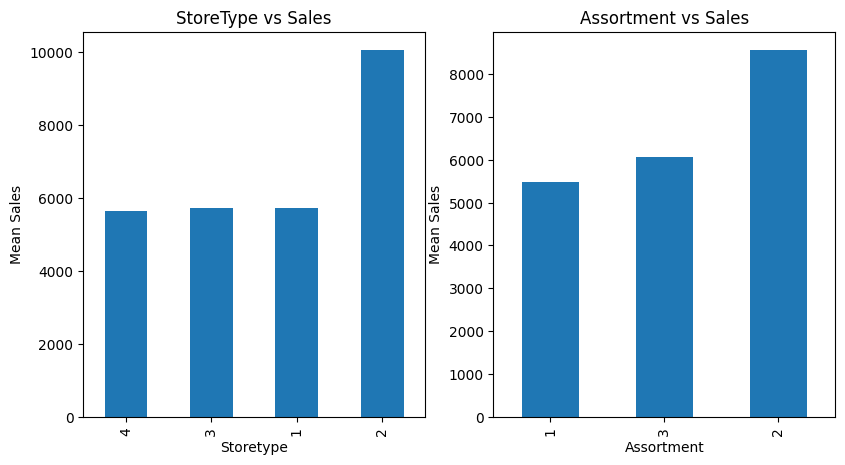

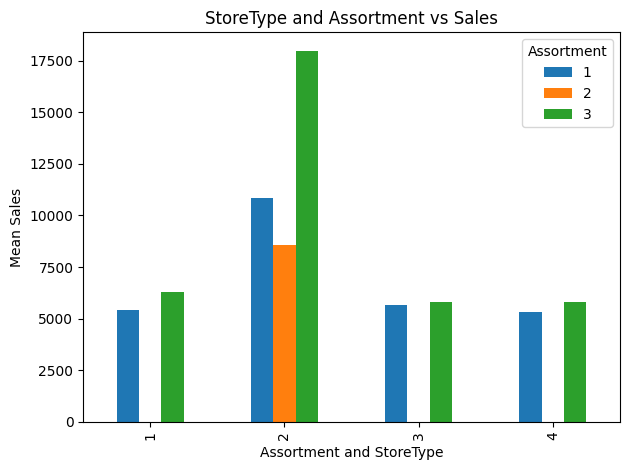

In [68]:
# Chart - 1 numerical data

print(df.groupby(['StoreType'])['Sales'].mean().sort_values(ascending=True))
print('--'*20)
print(df.groupby(['Assortment'])['Sales'].mean().sort_values(ascending=True))
print('--'*20)
print(df.groupby(['StoreType','Assortment'])['Sales'].mean().unstack())
print('--'*20)

# Chart - 1 visualization code

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df.groupby(['StoreType'])['Sales'].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("StoreType vs Sales")
plt.xlabel('Storetype')
plt.ylabel('Mean Sales')

plt.subplot(1,3,2)
df.groupby(['Assortment'])['Sales'].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("Assortment vs Sales")
plt.xlabel('Assortment')
plt.ylabel('Mean Sales')

plt.subplot(1,3,2)
df.groupby(['StoreType','Assortment'])['Sales'].mean().unstack().plot(kind='bar')
plt.title('StoreType and Assortment vs Sales')
plt.xlabel('Assortment and StoreType')
plt.ylabel('Mean Sales')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

##### 1. Why did you pick the specific chart?

* To Visualize data easily.

##### 2. What is/are the insight(s) found from the chart?

* StoreType b has highest sales among all and assortment b has highest sales
* StoreType b is selling highest amount of assortment c and lowest b
* Assortment b is only available in StoreType b

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes
* Assortment b only available in store type b need to available to another store too.

#### Chart - 2-Check Sales with respect to CompetitionDistance


----------------------------------------


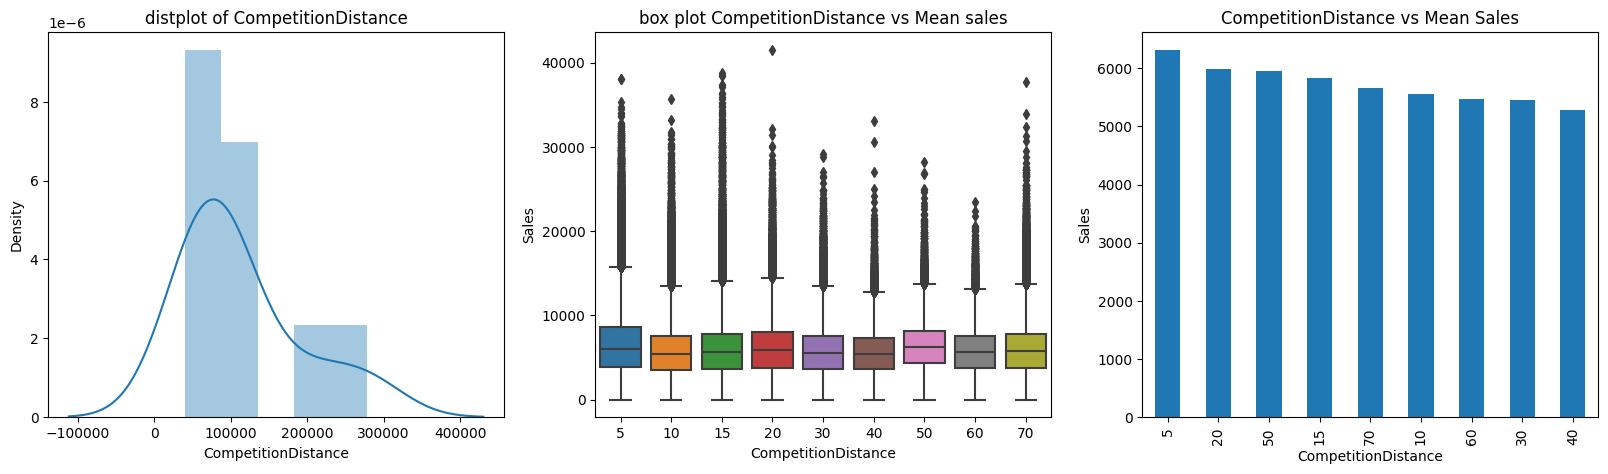

In [86]:
# Chart - 2  Numerical data
df.groupby('CompetitionDistance')['Sales'].mean().sort_values(ascending=False)
print('--'*20)

# Chart - 2 visualization code
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df['CompetitionDistance'].value_counts(),hist=True)
plt.title('distplot of CompetitionDistance')

plt.subplot(1,3,2)
sns.boxplot(x=df['CompetitionDistance'],y=df['Sales'])
plt.title('box plot CompetitionDistance vs Mean sales')

plt.subplot(1,3,3)
df.groupby('CompetitionDistance')['Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('CompetitionDistance vs Mean Sales')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
* To check density and distribution pattern

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* Distance less than or equal to 500 has highest Sale and lowest with distance 4000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Distance equal to 40 ie 3000-4000 has lowest sales

#### Chart - 3-Check Sales vs CompetitionOpenSinceMonth

0.0     323348
1.0      12452
2.0      37886
3.0      63548
4.0      87076
5.0      39608
6.0      45444
7.0      59434
8.0      36186
9.0     114254
10.0     55622
11.0     84455
12.0     57896
Name: CompetitionOpenSinceMonth, dtype: int64
----------------------------------------
CompetitionOpenSinceMonth
0.0     5758.628326
1.0     6172.995021
2.0     5429.783060
3.0     6018.509804
4.0     5721.389568
5.0     6253.914209
6.0     6355.309018
7.0     5605.731231
8.0     6242.269193
9.0     5674.837021
10.0    5672.669411
11.0    5482.371736
12.0    5620.760761
Name: Sales, dtype: float64
----------------------------------------


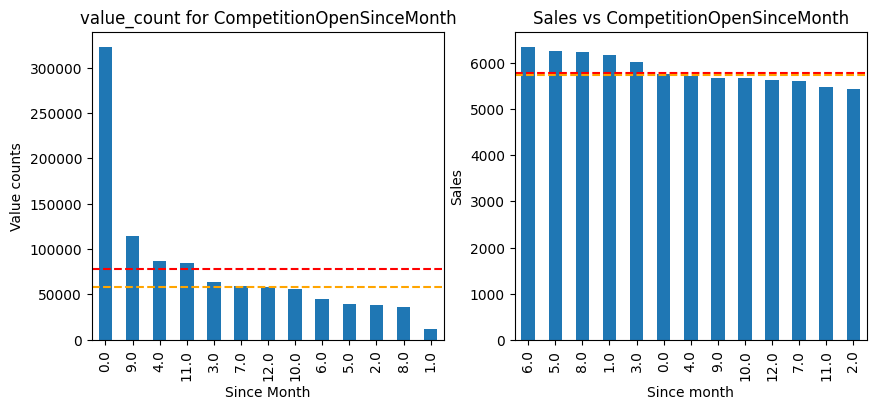

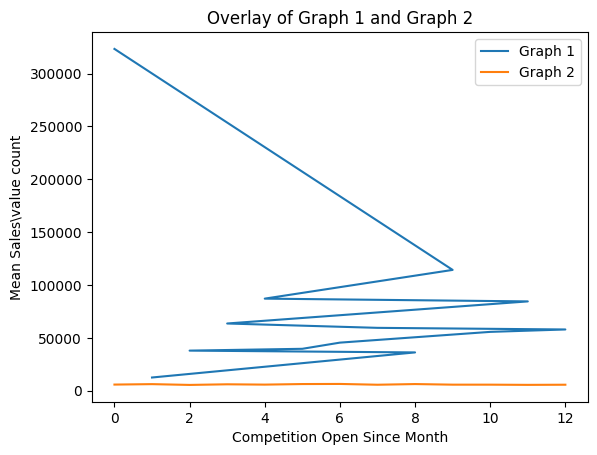

In [91]:
# Chart - 3-Numerical Data

#Check value count of CompetitionOpenSinceMonth
print(df['CompetitionOpenSinceMonth'].value_counts().sort_index())
print('--'*20)

#Check sales with respect to CompetitionOpenSinceMonth
print(df.groupby('CompetitionOpenSinceMonth')["Sales"].mean())
print('--'*20)

# Chart - 3 visualization code

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax=plt.gca()
df['CompetitionOpenSinceMonth'].value_counts().sort_values(ascending=False).plot(kind='bar')
ax.axhline(df['CompetitionOpenSinceMonth'].value_counts().mean(),color='red',linestyle='dashed')
ax.axhline(df['CompetitionOpenSinceMonth'].value_counts().median(),color='orange',linestyle='dashed')
plt.title('value_count for CompetitionOpenSinceMonth')
plt.xlabel('Since Month')
plt.ylabel('Value counts')

plt.subplot(1,2,2)
ax=plt.gca()
df.groupby('CompetitionOpenSinceMonth')["Sales"].mean().sort_values(ascending=False).plot(kind='bar')
ax.axhline(df["Sales"].mean(),color='red',linestyle='dashed')
ax.axhline(df["Sales"].median(),color='orange',linestyle='dashed')
plt.title('Sales vs CompetitionOpenSinceMonth')
plt.xlabel('Since month')
plt.ylabel('Sales')
plt.show()

# Plotting the first graph
plt.plot(df['CompetitionOpenSinceMonth'].value_counts(), label='Graph 1')
# Plotting the second graph
plt.plot(df.groupby('CompetitionOpenSinceMonth')["Sales"].mean(), label='Graph 2')
# Adding labels and title
plt.xlabel('Competition Open Since Month')
plt.ylabel('Mean Sales\\value count')
plt.title('Overlay of Graph 1 and Graph 2')
# Displaying the legend
plt.legend()
# Displaying the overlapped graph
plt.show()


##### 1. Why did you pick the specific chart?

* To check Trend.

##### 2. What is/are the insight(s) found from the chart?

* The highest number of no Competition start and in second placed since month 9.
* The Competition start since 6 month has highest sales shown and lowest at 2 month

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The lowest sales in competition started since 2 month.

#### Chart - 4-Check Sales vs CompetitionOpenSinceYear

0.0       323348
1900.0       758
1961.0       942
1990.0      4710
1994.0      1884
1995.0      1700
1998.0       942
1999.0      7352
2000.0      9236
2001.0     14704
2002.0     24882
2003.0     16794
2004.0     19804
2005.0     56564
2006.0     42802
2007.0     43744
2008.0     48476
2009.0     49396
2010.0     51258
2011.0     49396
2012.0     74299
2013.0     75426
2014.0     63732
2015.0     35060
Name: CompetitionOpenSinceYear, dtype: int64
----------------------------------------
CompetitionOpenSinceYear
0.0       5758.628326
1900.0    6889.460422
1961.0    6460.928875
1990.0    5915.546921
1994.0    5987.539809
1995.0    6160.058824
1998.0    6091.211253
1999.0    5698.102557
2000.0    6515.340082
2001.0    5323.590860
2002.0    5473.457319
2003.0    5788.870966
2004.0    5224.698192
2005.0    5659.650997
2006.0    5787.615999
2007.0    5449.721928
2008.0    5597.502310
2009.0    5933.889060
2010.0    5631.378653
2011.0    5665.623856
2012.0    5715.770643
2013.0    6483.6842

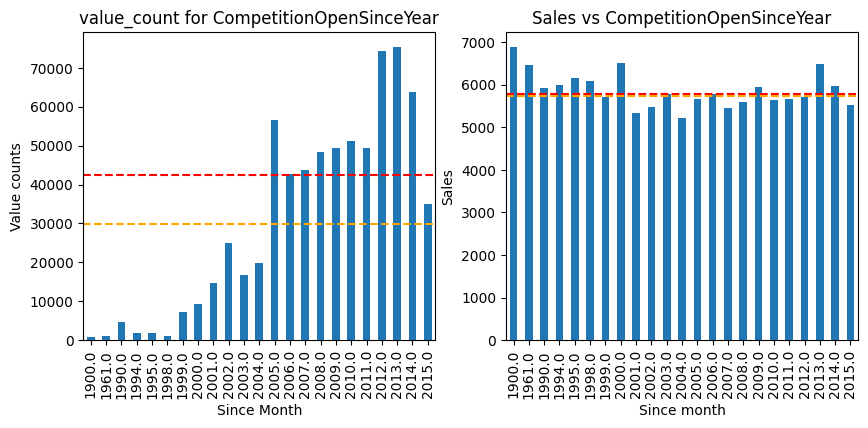

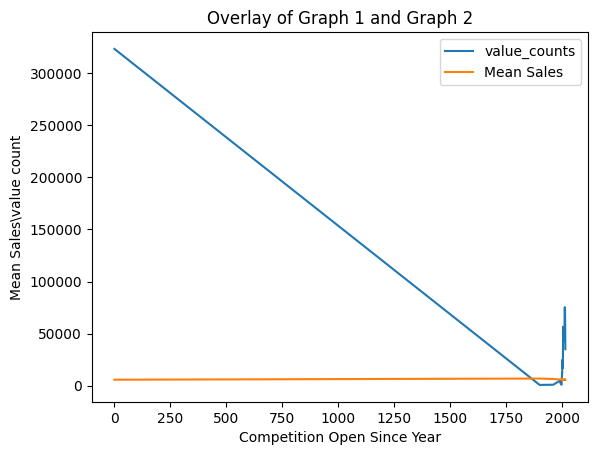

In [103]:
# Chart - 4 Numerical Data

#Check value count of CompetitionOpenSinceYear
print(df['CompetitionOpenSinceYear'].value_counts().sort_index())
print('--'*20)

#Check sales with respect to CompetitionOpenSinceYear
print(df.groupby('CompetitionOpenSinceYear')["Sales"].mean())
print('--'*20)

# Chart - 4 visualization code

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax=plt.gca()
df['CompetitionOpenSinceYear'].value_counts().sort_index()[1:].plot(kind='bar')   #just ignoring zero value for better visualization
ax.axhline(df['CompetitionOpenSinceYear'].value_counts().mean(),color='red',linestyle='dashed')
ax.axhline(df['CompetitionOpenSinceYear'].value_counts().median(),color='orange',linestyle='dashed')
plt.title('value_count for CompetitionOpenSinceYear')
plt.xlabel('Since Month')
plt.ylabel('Value counts')

plt.subplot(1,2,2)
ax=plt.gca()
df.groupby('CompetitionOpenSinceYear')["Sales"].mean()[1:].plot(kind='bar')  #just ignoring zero value for better visualization
ax.axhline(df["Sales"].mean(),color='red',linestyle='dashed')
ax.axhline(df["Sales"].median(),color='orange',linestyle='dashed')
plt.title('Sales vs CompetitionOpenSinceYear')
plt.xlabel('Since month')
plt.ylabel('Sales')
plt.show()

# Plotting the first graph
plt.plot(df['CompetitionOpenSinceYear'].value_counts().sort_index(), label='value_counts')
# Plotting the second graph
plt.plot(df.groupby('CompetitionOpenSinceYear')["Sales"].mean(), label='Mean Sales')
# Adding labels and title
plt.xlabel('Competition Open Since Year')
plt.ylabel('Mean Sales\\value count')
plt.title('Overlay of Graph 1 and Graph 2')
# Displaying the legend
plt.legend()
# Displaying the overlapped graph
plt.show()


##### 1. Why did you pick the specific chart?

* To check data distribution.

##### 2. What is/are the insight(s) found from the chart?

* The highest sales in 1900.
* The sales is constant year on year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Sales ie demand of market is not increasing there is little fluctuation in sales

#### Chart - 5-Check sales with respect to 'Promo2', 'Promo2SinceWeek','Promo2SinceYear'

Promo2
0    6124.710161
1    5423.718218
Name: Sales, dtype: float64
----------------------------------------
Promo2SinceWeek
1    5982.367704
2    5364.576251
3    5224.368473
4    5479.843880
5    5801.091070
Name: Sales, dtype: float64
----------------------------------------
Promo2SinceYear
0.0       6124.710161
2009.0    5761.243312
2010.0    5446.156810
2011.0    5484.207516
2012.0    5298.761063
2013.0    4900.741690
2014.0    5916.283627
2015.0    5124.890963
Name: Sales, dtype: float64
----------------------------------------


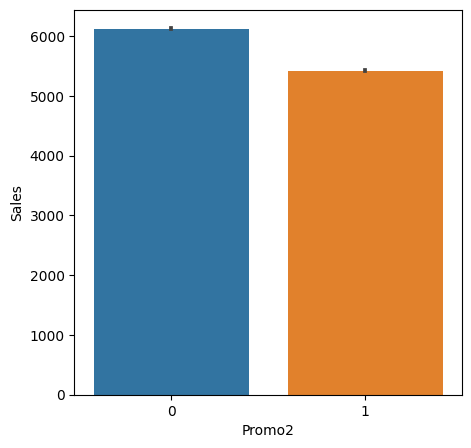

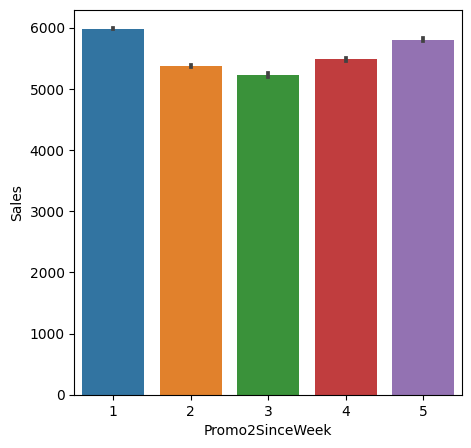

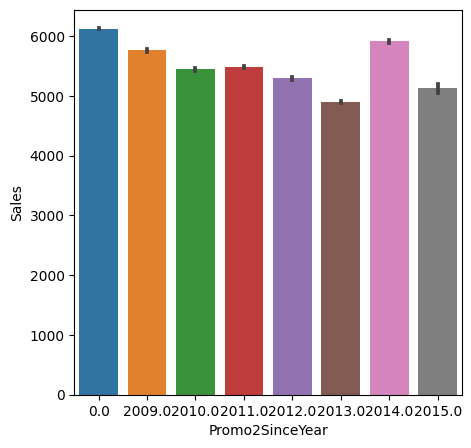

In [108]:
# Chart -5-Numerical Data

for i in ['Promo2', 'Promo2SinceWeek','Promo2SinceYear']:
    print(df.groupby(i)['Sales'].mean())
    print('--'*20)

# Chart - 5 visualization code

for i in ['Promo2', 'Promo2SinceWeek','Promo2SinceYear']:

      plt.figure(figsize=(5,5))
      sns.barplot(x=df[i],y=df['Sales'])
      plt.show()

##### 1. Why did you pick the specific chart?

* To visualize easily trend of promo2.

##### 2. What is/are the insight(s) found from the chart?

* Without promo2 also sales is high.
* Promo2 since week increases Sales lightly upwards.
* Promo2 since year not much helpfull.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Promo2 since week only help to increase sales within week .

#### Chart - 6-check sales with respect to PromoInterval, DayOfWeek, and Date

PromoInterval
0    6124.710161
1    5562.364063
2    5311.048585
3    5143.829243
Name: Sales, dtype: float64
----------------------------------------
DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64
----------------------------------------
Date           1            2            3            4            5   \
Date                                                                    
2013  5211.555578  5494.371397  5820.349168  5483.749836  5364.127383   
2014  5431.875799  5731.091512  5584.257312  5815.993333  5632.670534   
2015  5752.747866  5710.296541  5949.130132  5916.857578  5472.122002   

Date           6            7            8            9            10  \
Date                                                                    
2013  5402.162960  6042.062260  5729.574049  5322.988430  5429.258788   
2014  5681.526188  5999.403381  5649.421252  5865.104029  5665.564

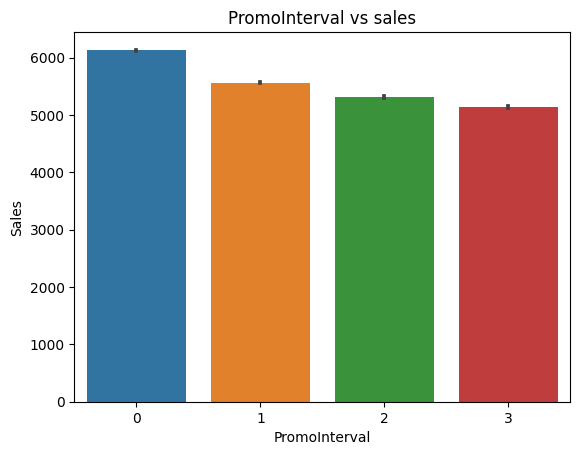

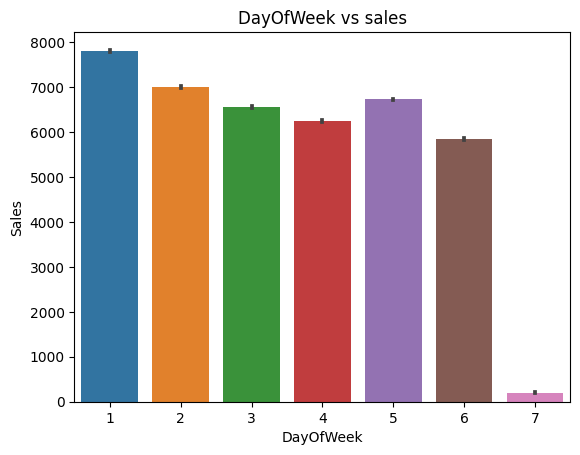

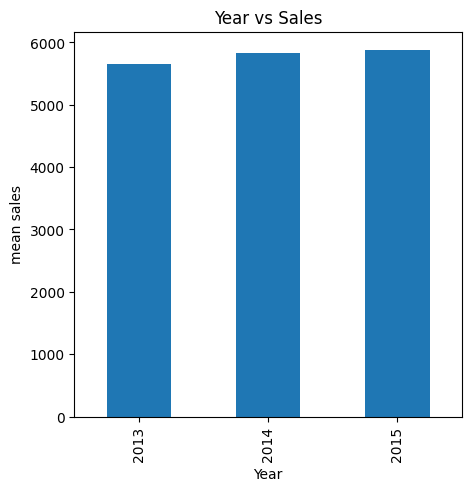

<Figure size 4500x500 with 0 Axes>

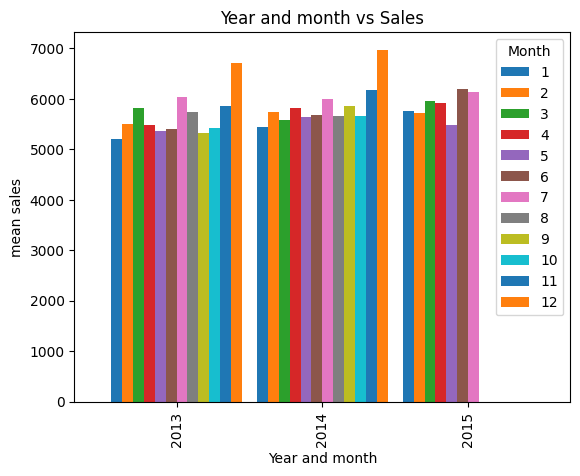

In [111]:
# Chart - 6-Numerical data

print(df.groupby('PromoInterval')['Sales'].mean())
print('--'*20)
#To find sales with respect to day

print(df.groupby('DayOfWeek')['Sales'].mean())
print('--'*20)

# to find sales with respect to year and month

print(df.groupby([df['Date'].dt.year,df['Date'].dt.month])['Sales'].mean().unstack())
print('--'*20)

# Chart - 6- visualization code

for i in ['PromoInterval','DayOfWeek']:
    sns.barplot(x=df[i],y=df['Sales'])
    plt.title(i + ' vs sales')
    plt.show()

plt.figure(figsize=(5,5))

df.groupby(df['Date'].dt.year)['Sales'].mean().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('mean sales')
plt.title('Year vs Sales')
plt.show()

plt.figure(figsize=(45,5))
df.groupby([df['Date'].dt.year,df['Date'].dt.month])['Sales'].mean().unstack().plot(kind='bar',width=0.9)
plt.xlabel('Year and month')
plt.ylabel('mean sales')
plt.title('Year and month vs Sales')
plt.legend(title='Month')
plt.show()

##### 1. Why did you pick the specific chart?

* Help to visulize easily.

##### 2. What is/are the insight(s) found from the chart?

* Higher sales during PromoInterval-1 (ie.'Jan,Apr,Jul,Oct') and it is decreases simulteneously with other.
* Highest sales on day 1 (ie. Monday) and lowest on 7 (ie.Sunday)
* Year on year sales is slightly increasing.
* At the end of year sales is highest

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we may keep shop close on sunday ie day 7.

#### Chart - 7-check sales vs ('Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday')

Customers
0           0.0
3           0.0
5           0.0
8          46.0
13        124.0
         ...   
5297    37403.0
5387    34692.0
5458    38484.0
5494    35702.0
7388    27190.0
Name: Sales, Length: 4086, dtype: float64
----------------------------------------
Open
0       0.000000
1    6955.514291
Name: Sales, dtype: float64
----------------------------------------
Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64
----------------------------------------
StateHoliday
0    5947.483893
1     290.735686
2     214.311510
3     168.733171
Name: Sales, dtype: float64
----------------------------------------
SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64
----------------------------------------


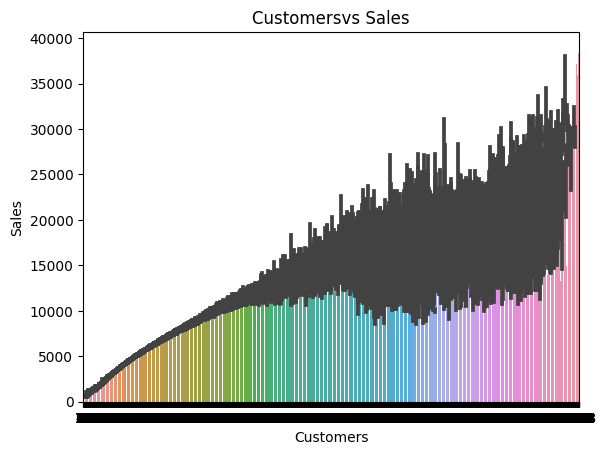

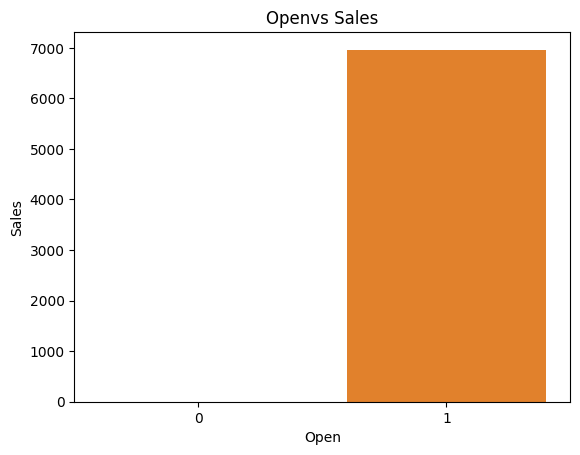

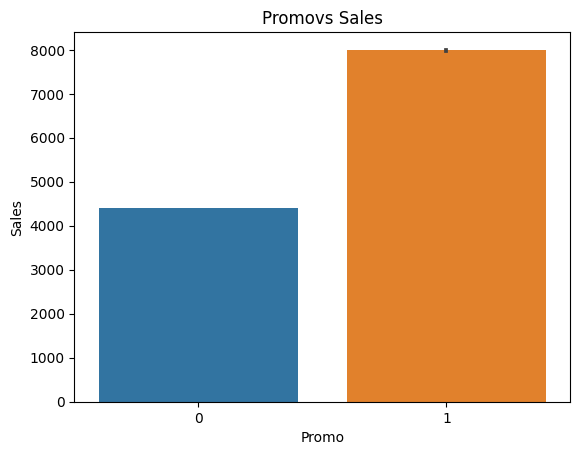

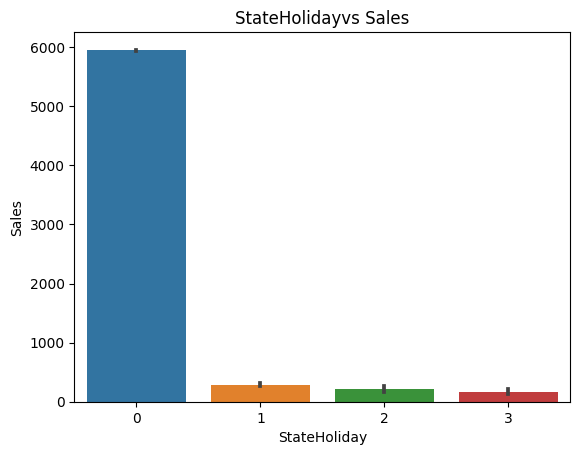

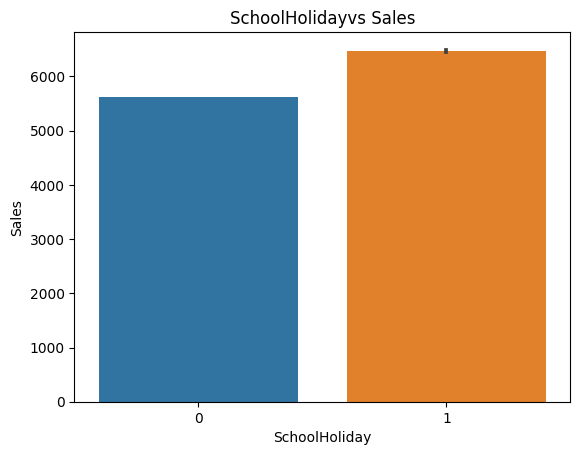

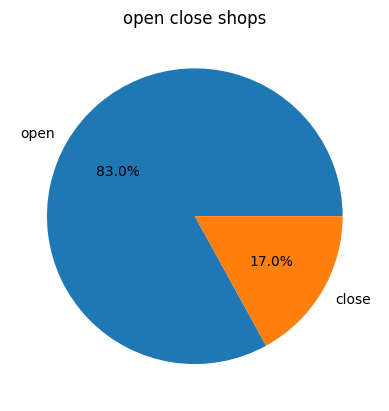

In [242]:
#Chart - 7-Numerical Data

for i in ['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']:
  print(df.groupby(i)['Sales'].mean())
  print('--'*20)

# Chart - 7 visualization code

for i in ['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']:
    sns.barplot(x=df[i],y=df['Sales'])
    plt.title(i + 'vs Sales')
    plt.show()

plt.pie(df['Open'].value_counts(),labels=['open','close'] , autopct='%.1f%%')
plt.title("open close shops")
plt.show()

##### 1. Why did you pick the specific chart?

* To visualize easily.

##### 2. What is/are the insight(s) found from the chart?

* Near about 17 % shops are closed.
* With promo sales is high.
* During school holiday sales is high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Need to open closed shop there is percent is more than 1/8th

#### Chart - 8-Scatter plot

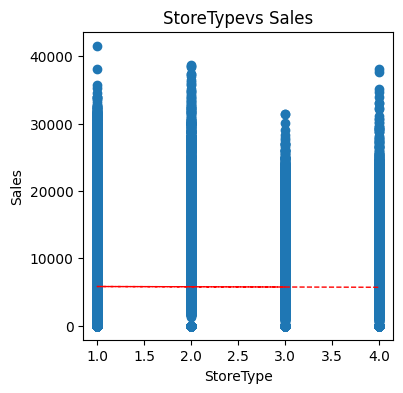

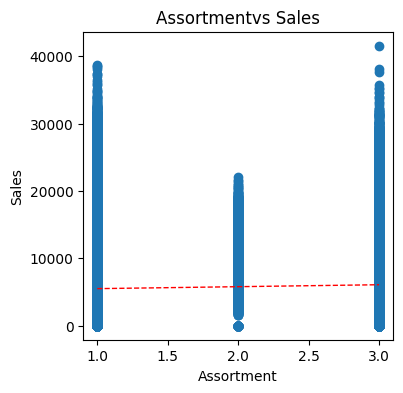

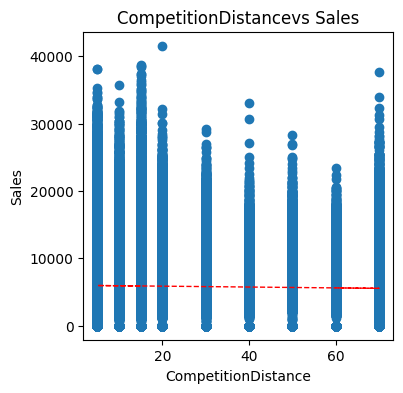

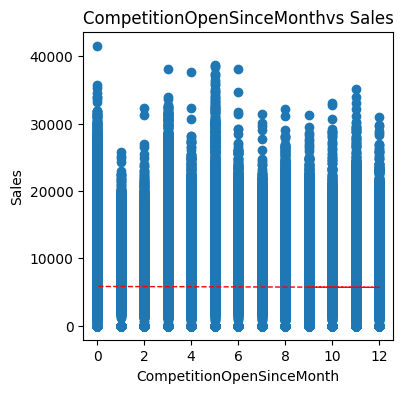

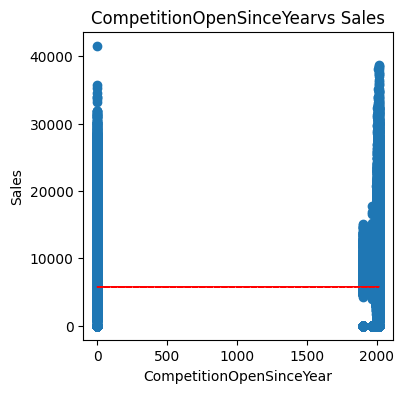

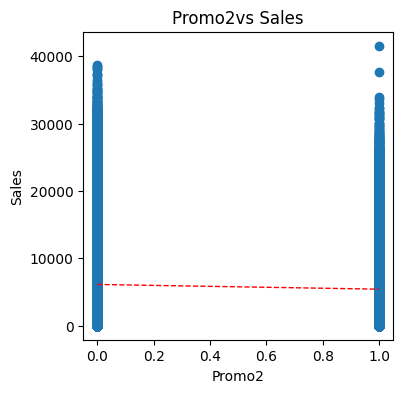

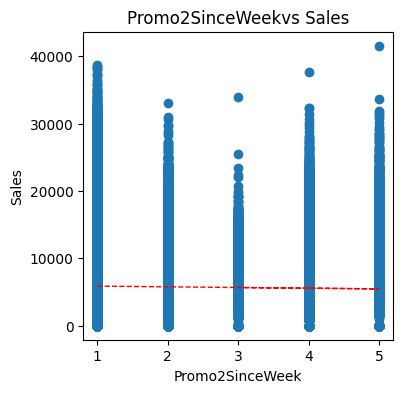

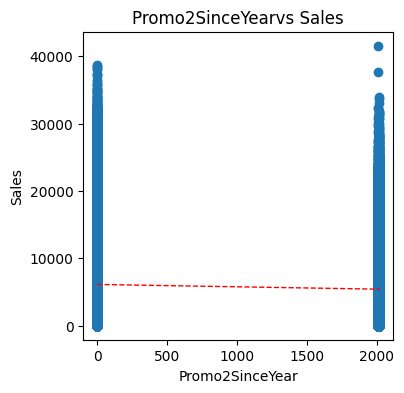

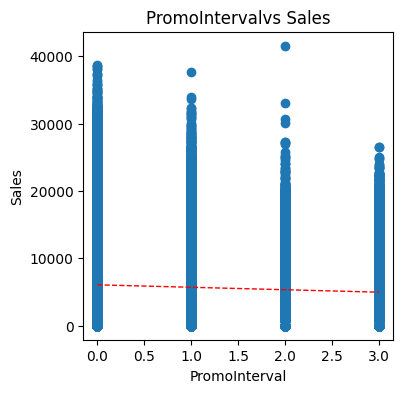

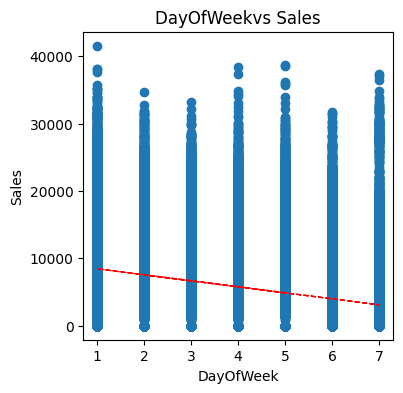

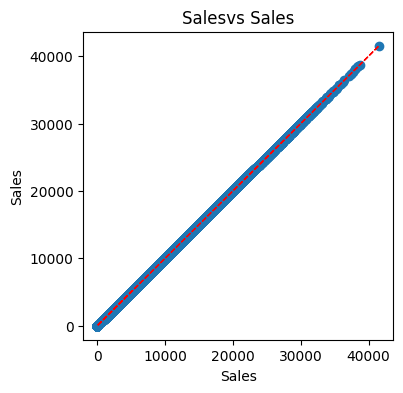

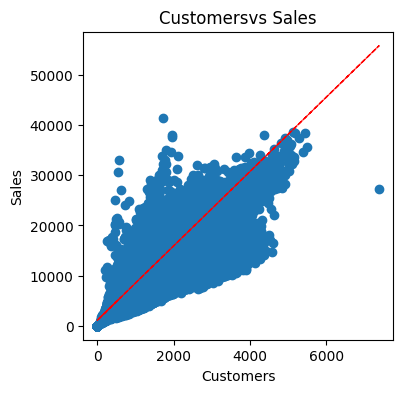

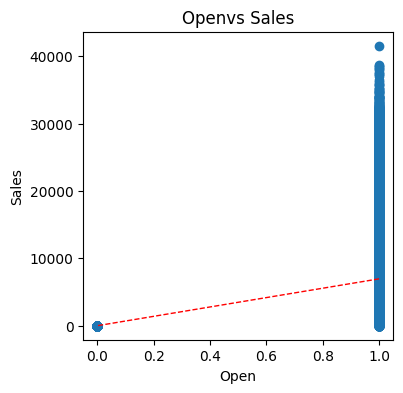

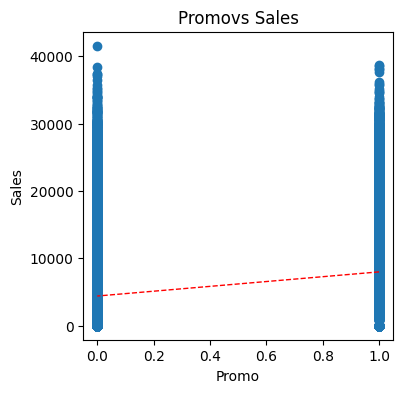

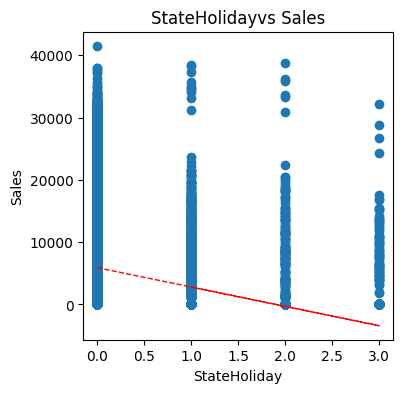

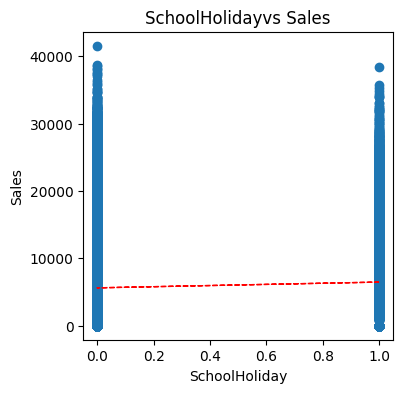

In [267]:
# Chart - 8 visualization code-scatter plot

for i in df.columns:
  if i != "Date":
    plt.figure(figsize=(4,4))
    plt.scatter(df[i],df['Sales'])
    plt.title(i +'vs Sales')
    plt.xlabel(i)
    plt.ylabel('Sales')
    z=np.polyfit(df[i],df['Sales'],1)
    y_hat=np.poly1d(z)(df[i])
    plt.plot(df[i],y_hat,"r--", lw=1)
    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9-Box plot

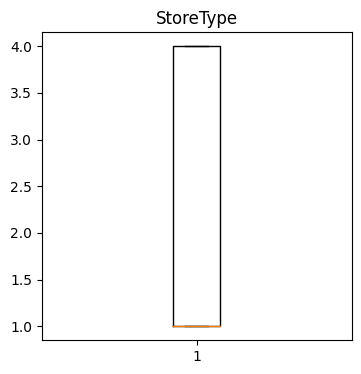

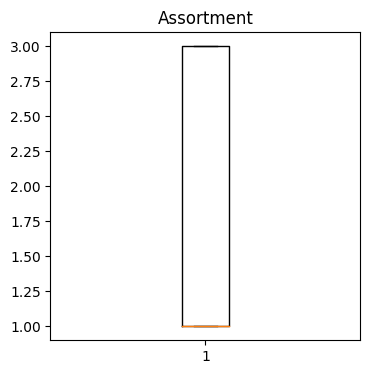

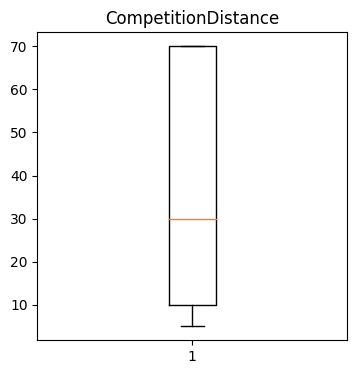

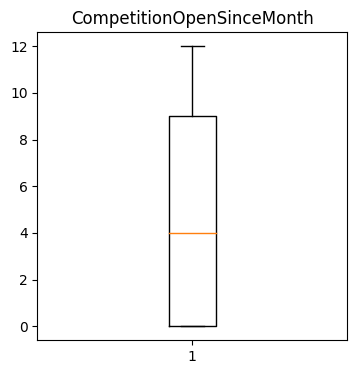

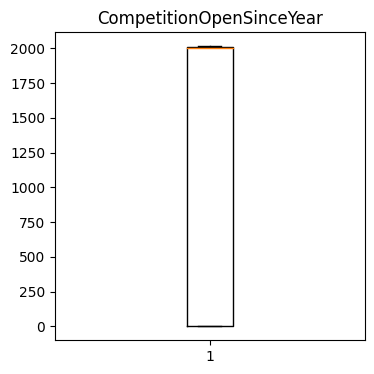

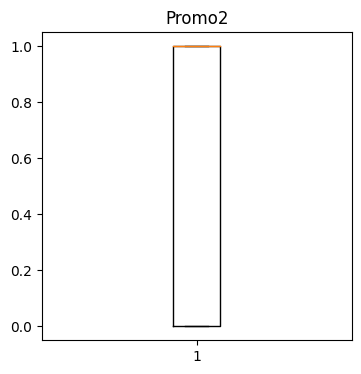

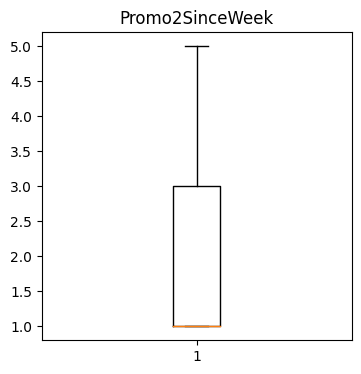

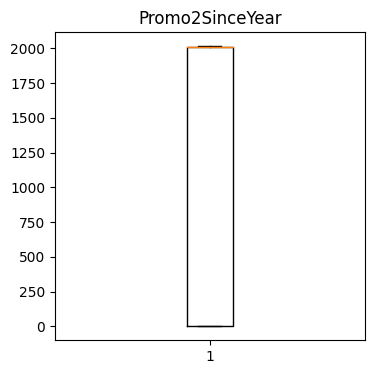

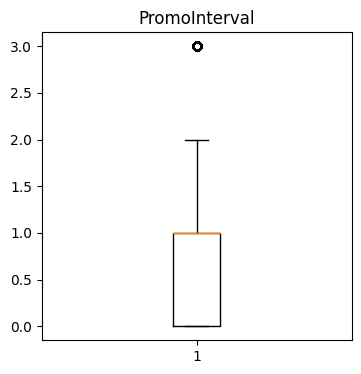

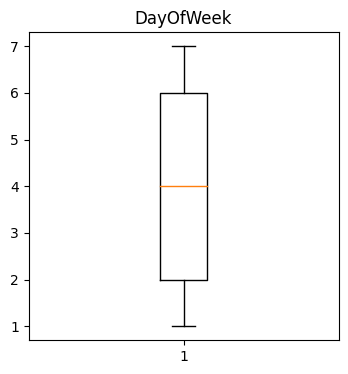

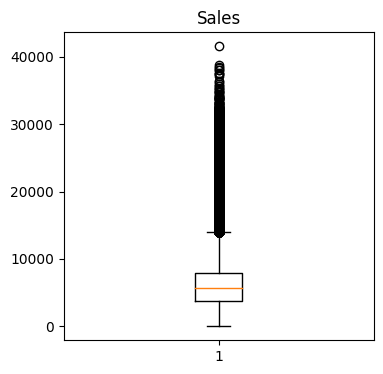

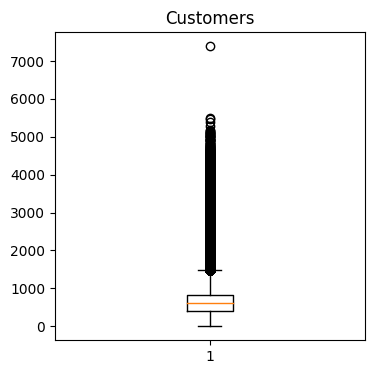

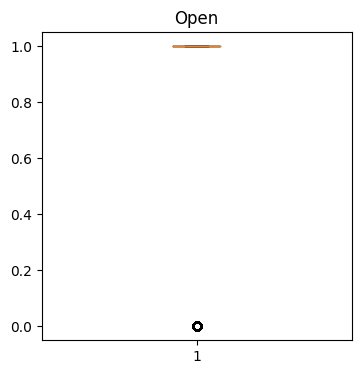

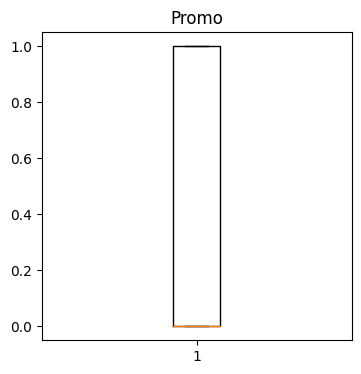

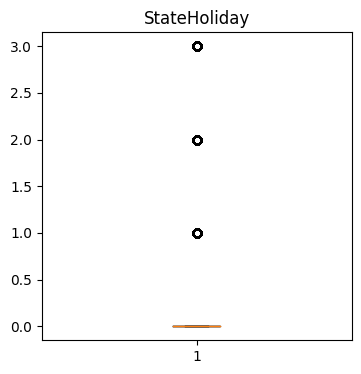

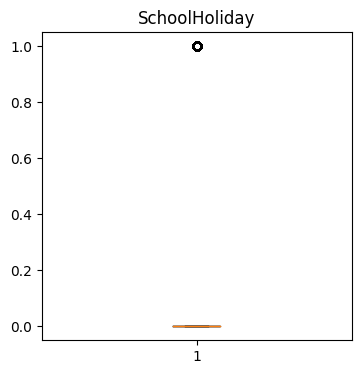

In [261]:
# Chart - 9 visualization code-box plot

for i in df.columns:
  if i != 'Date':
    plt.figure(figsize=(4,4))
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Correlation Heatmap

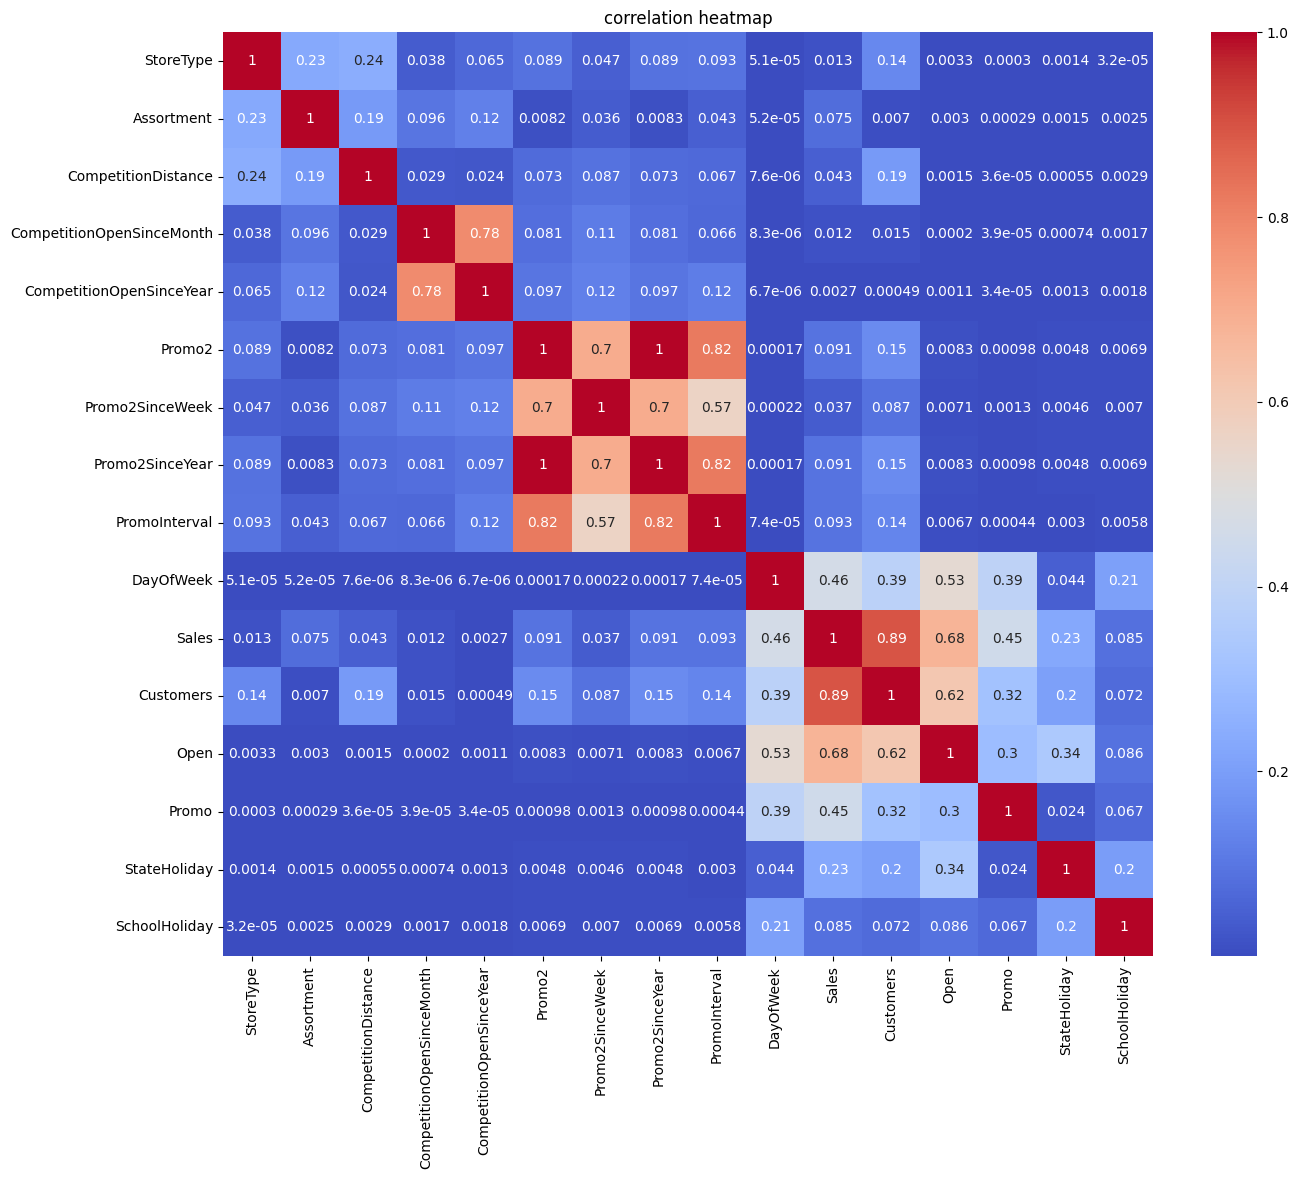

In [251]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,12))
sns.heatmap(abs(df.corr()) ,annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Heat map showing easily the corretion.

##### 2. What is/are the insight(s) found from the chart?

* There is getting information about correlation of one variable with another.

#### Chart - 11 - Pair Plot

<Figure size 2000x2000 with 0 Axes>

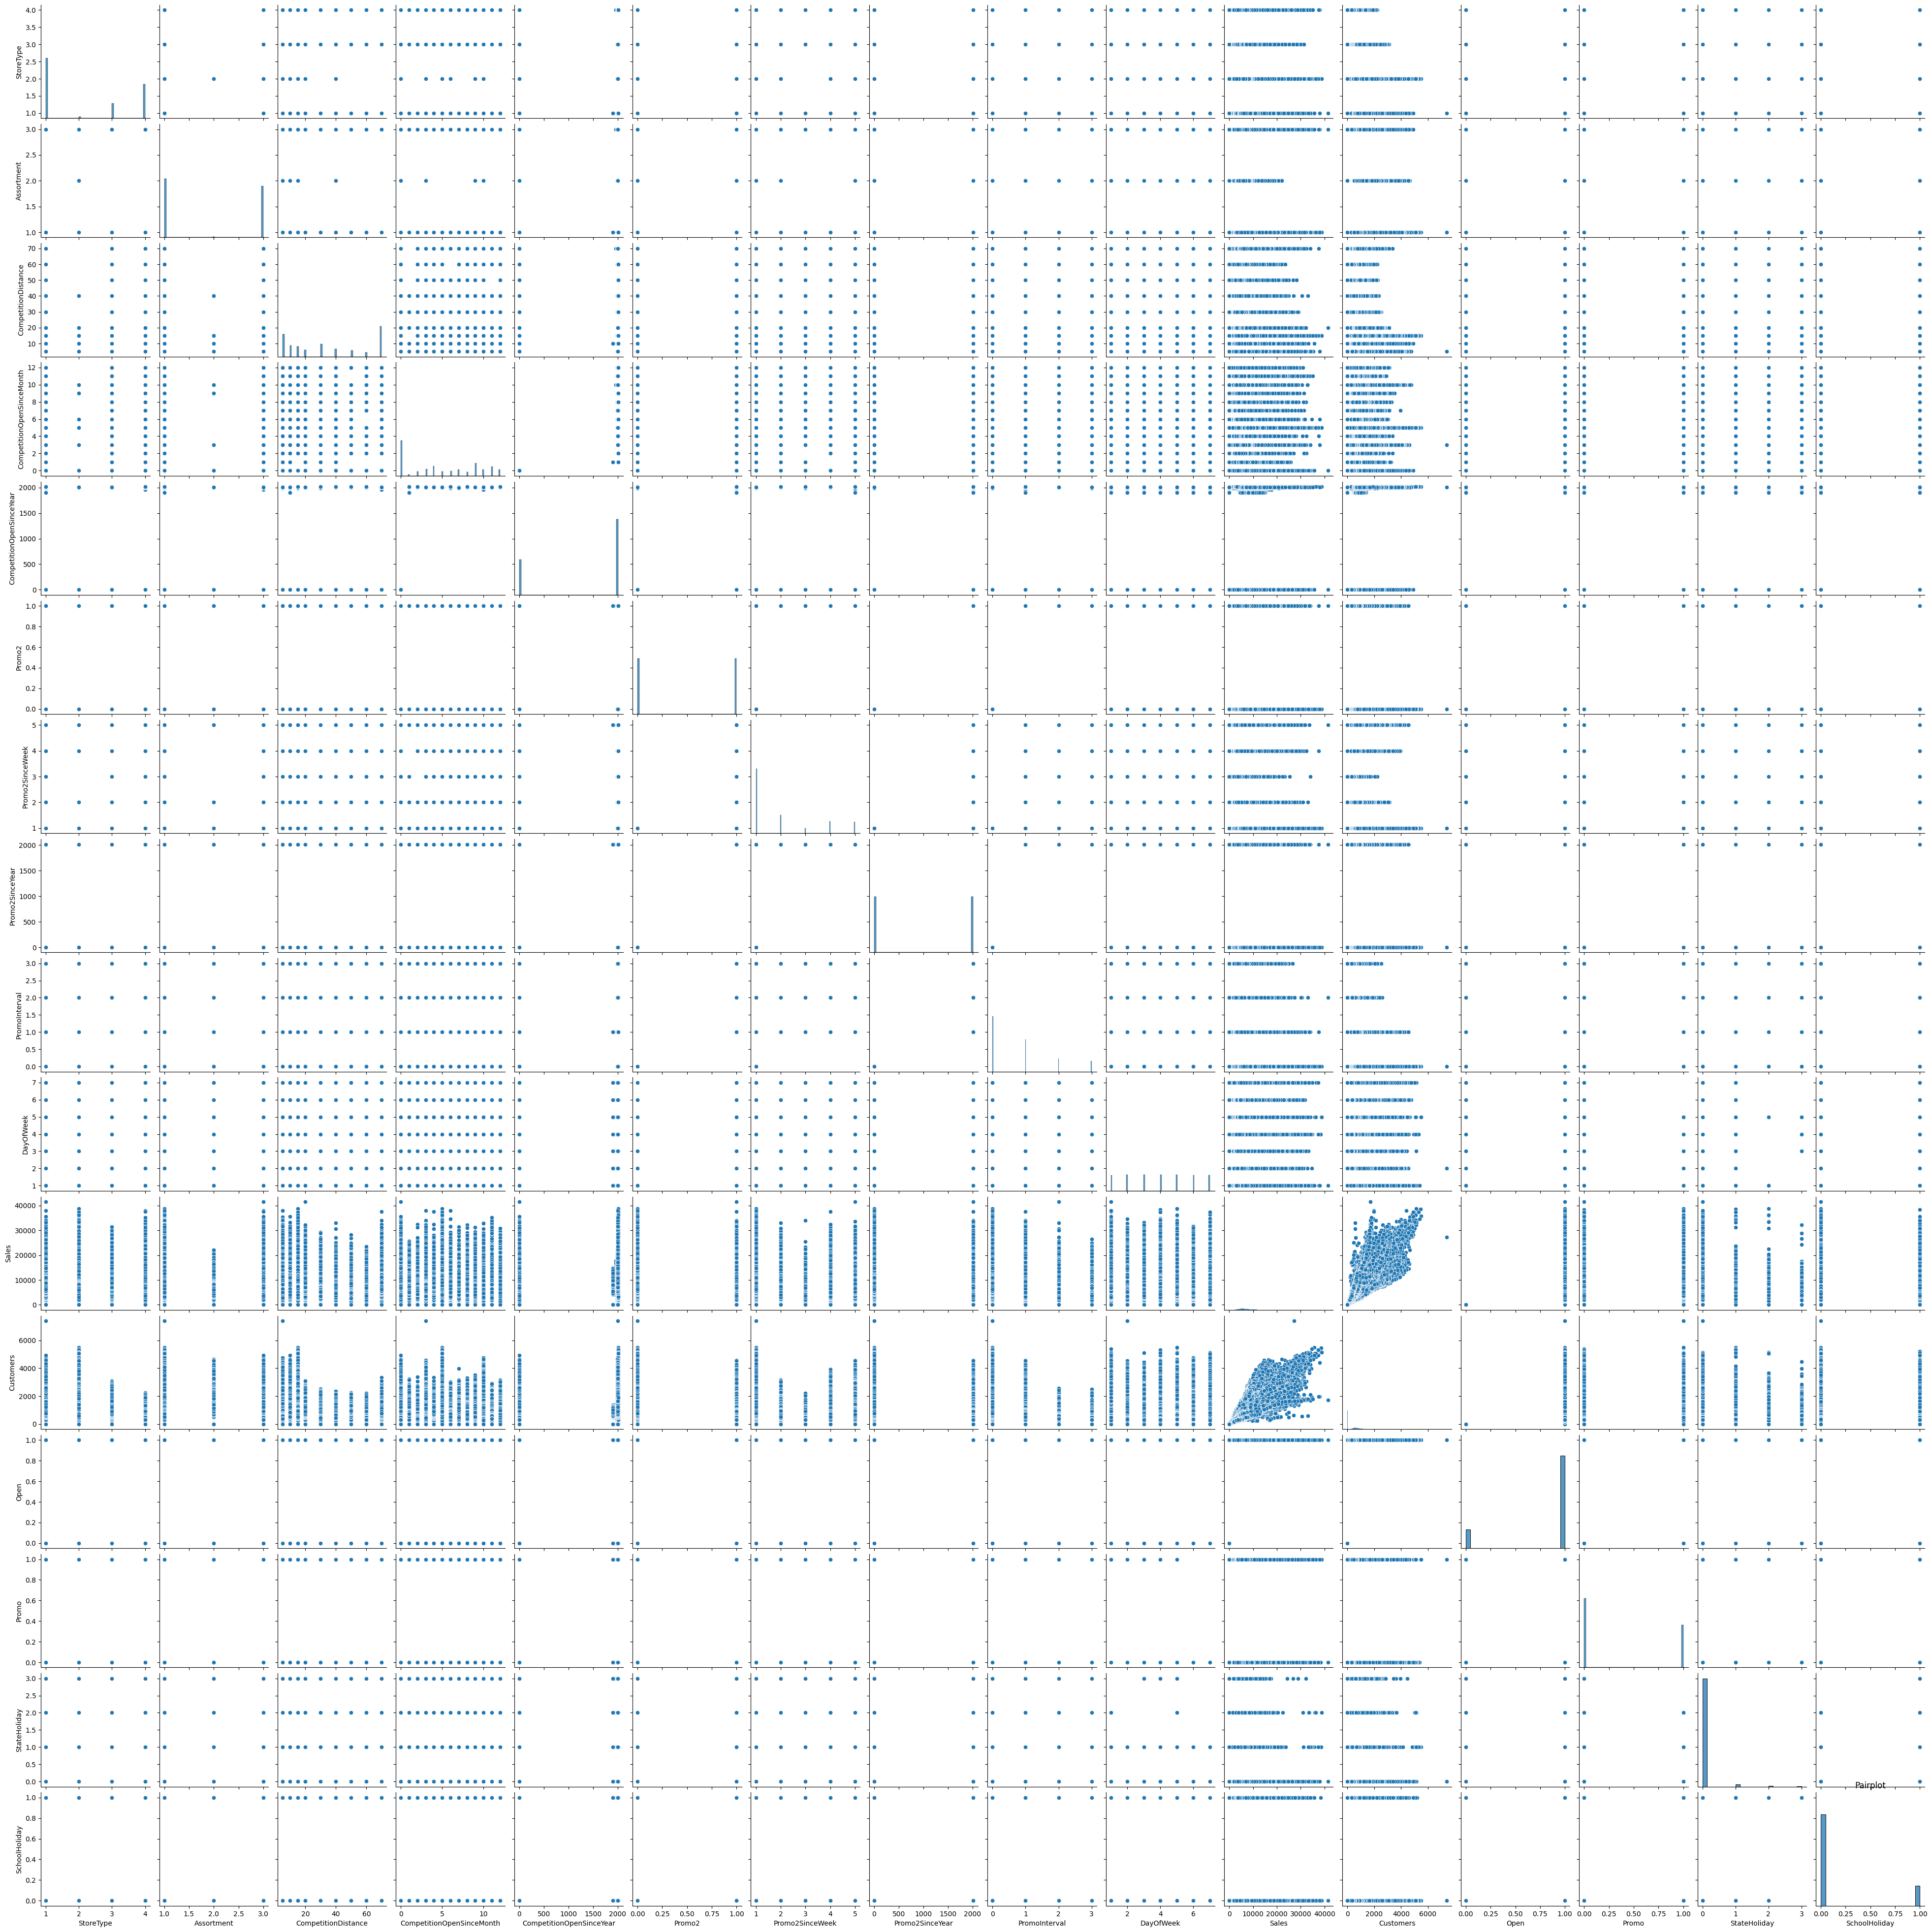

In [254]:
# Pair Plot visualization code

plt.figure(figsize=(20,20))
sns.pairplot(data=df)
plt.title('Pairplot')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***